In [1]:
import matplotlib.pyplot as plt
import torch
import numpy as np
from torchvision.models import resnet18
import torchvision
import imp 
LRP = imp.load_source('LRP', '../__init__.py')
from LRP import lrp
from skimage import io
from skimage import transform

In [2]:
model = resnet18(pretrained=True)
model = model.eval()
lrp = lrp.LRP(model, 'z_rule')

/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


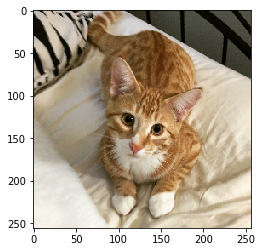

(256, 256, 3)


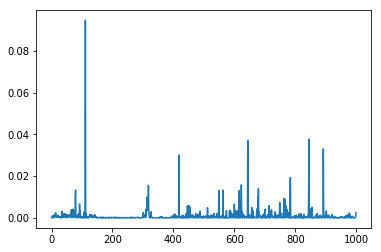

random input pred  tensor(111)


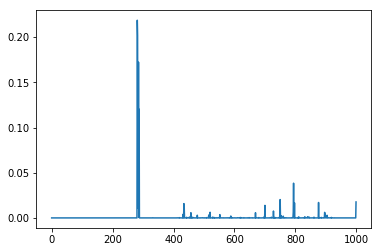

image input pred  tensor(281)


In [3]:
image = io.imread('image_cat.jpg')
# plt.imshow(image)
# plt.show()
# print(image.shape)
image = transform.resize(image, (256, 256), preserve_range=True).astype(np.uint8)
image.shape
plt.imshow(image)
plt.show()
print(image.shape)


image = image / 255

f = torchvision.transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])

# input_image = f(torch.tensor(image).permute(2,0,1)).unsqueeze(0).float()
input_image = torch.tensor(image).permute(2,0,1).unsqueeze(0).float()
output1 = model(torch.rand(1,3,256,256))
output2 = model(input_image)

plt.plot(torch.softmax(output1, dim=-1).squeeze().detach())
plt.show()
print('random input pred ', output1.argmax())
plt.plot(torch.softmax(output2, dim=-1).squeeze().detach())
plt.show()
print('image input pred ', output2.argmax())


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


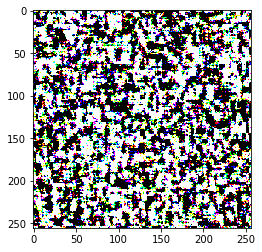

In [8]:
input1 = torch.rand(1,3,256,256)

output1 = lrp(input1)
relevance = lrp.relprop()
plt.imshow(relevance.squeeze().permute(1,2,0))

In [10]:
relevance.min()

tensor(-1.2333e+21)

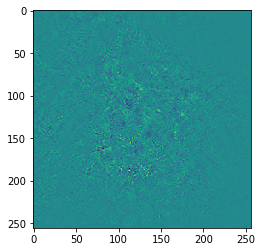

In [12]:
input2 = input_image
input2.requires_grad_(True)
output2 = model(input2)
output2.backward((output2==output2.max()).float())
plt.imshow(input2.grad.squeeze().permute(1,2,0)[:,:,0])

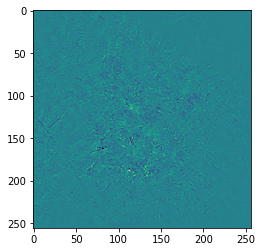

In [13]:
plt.imshow(input2.grad.squeeze().permute(1,2,0)[:,:,1])

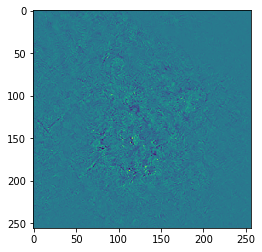

In [14]:
plt.imshow(input2.grad.squeeze().permute(1,2,0)[:,:,2])